### Exploration Data Analysis

In [129]:
import pandas as pd
url='https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
fuel_data = pd.read_csv(url, error_bad_lines=False)
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [130]:
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2000_12_182_1_12,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [18]:
print(fuel_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB
None


In [116]:
""" Q1: Which of the following fuel type code has the lowest average fuel cost per unit burned? """

low_aver_fuel_cost = fuel_data.groupby("fuel_type_code_pudl")["fuel_cost_per_unit_burned"].mean().to_frame().reset_index()

print(low_aver_fuel_cost.min())

fuel_type_code_pudl             coal
fuel_cost_per_unit_burned    13.6594
dtype: object


In [26]:
""" Q2: What is the standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit) in two decimal places? """

fuel_data['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [118]:
""" Q3: What is the skewness and kurtosis for the fuel quantity burned in two decimal places? """

from scipy.stats import kurtosis, skew
k = kurtosis(fuel_data["fuel_qty_burned"])
s = skew(fuel_data["fuel_qty_burned"])
print('The skewness and kurtosis for the fuel quantity burned is respectively {} and {}'.format(round(s,2), round(k,2)))

The skewness and kurtosis for the fuel quantity burned is respectively 15.85 and 651.26


In [62]:
""" Q4: Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places?"""

fuel_data.isnull().sum() > 0

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                        True
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [134]:
""" Q4: Which feature has missing values and what is the total number of missing value and percentage of the missing rows as a factor of the total number of rows in three decimal places?"""

Total = fuel_data["fuel_unit"].isnull().sum()
percent = round(100*fuel_data["fuel_unit"].isnull().sum()/fuel_data["fuel_unit"].count(), 3)
print(f"Feature: fuel_unit, Total: {Total}, Percent: {percent}%")

Feature: fuel_unit, Total: 180, Percent: 0.613%


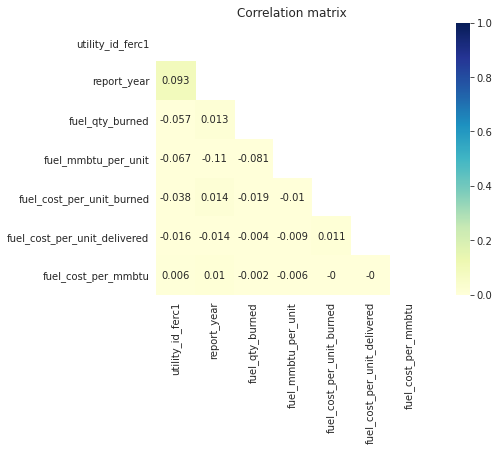

In [135]:
""" Q5: Which of the features has the second and third lowest correlation with the Fuel Cost Per Unit Burned?"""
import seaborn as sns
import matplotlib.pyplot as plt
correlation = round(fuel_data.drop(columns=["record_id"]).corr(), 3)
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 5))
    ax = sns.heatmap(correlation, cmap="YlGnBu", annot = True,
            mask=mask, square=True, vmin=0, vmax=1).set(title = 'Correlation matrix')

In [107]:
"""Q5: or the fuel type coal, what is the percentage change in the fuel cost per unit burned in 1998 compared to 1994? """
f
uel_coal_1994_data= fuel_data[(fuel_data["fuel_type_code_pudl"] == "coal") & (fuel_data["report_year"] == 1994)]
fuel_coal_19948data= fuel_data[(fuel_data["fuel_type_code_pudl"] == "coal") & (fuel_data["report_year"] == 19948]
opf_1998 = fuel_coal_1998_data['fuel_cost_per_unit_burned'].sum()
f
_1998 4u= el_coal_1994_data['fuel_cost_per_unit_burned'].sum()
pri
npercent_change = 100*(f_1998 - f_1994)/f_1994t(
)round("The percentage change in the fuel cost per unit burned in 1998 compared to 1994 is",int(percepercent_change10%0"),"

The percentage change in the fuel cost per unit burned in 1998 compared to 1994 is -21 %


In [141]:
"""Q6: Which year has the highest average fuel cost per unit delivered?"""

high_aver_fuel_cost_deliv = fuel_data.groupby("report_year")["fuel_cost_per_unit_delivered"].mean().to_frame().reset_index()

print(high_aver_fuel_cost_deliv.max())

report_year                      2018.000000
fuel_cost_per_unit_delivered    11140.197239
dtype: float64
